In [ ]:
#https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d
#https://towardsdatascience.com/telco-customer-churn-prediction-72f5cbfb8964
#https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0191-6
#https://www.kaggle.com/bandiatindra/telecom-churn-prediction

Step for test: 
Step 1: Problem Definition
Step 2: Data Collection
Step 3: Exploratory Data Analysis (EDA)
Step 4: Feature Engineering
Step 5: Train/Test Split
Step 6: Model Evaluation Metrics Definition
Step 7: Model Selection, Training, Prediction and Assessment
Step 8: Hyperparameter Tuning/Model Improvement

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

# Step 1: Problem Identification 

Based on the introduction the key challenge is to predict if an individual customer will churn or not.  machine learning models are trained based on 80% of the sample data. The remaining 20% are used to apply the trained models and assess their predictive power with regards to “churn / not churn”. A side question will be, which features actually drive customer churn. That information can be used to identify customer “pain points” and resolve them by providing goodies to make customers stay.he balance between classes (number of “churners” vs. “non-churners” in data set) 

proves that retaining an existing customer costs much lower than acquiring a new one [3], in addition to being considered much easier than the upselling strategy [4]. To apply the third strategy, companies have to decrease the potential of customer’s churn, known as “the customer movement from one provider to another” [5].

# Step 2: Data Collection

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
churn = pd.read_csv('train.csv')


# Step 3: Exploratory Data Analysis

Goal of this step is to get an understanding of the data structure, conduct initial preprocessing, clean the data, identify patterns and inconsistencies in the data (i.e. skewness, outliers, missing values) and build and validate hypotheses.

In the first part of EDA the data frame is evaluated for structure, columns included and data types. The goals of this step are to get a general understanding for the data set, check domain knowledge and get first ideas on topics to investigate.

In [ ]:
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

object: Object format means variables are categorical. int64: It represents the integer variables. Senior citizen. float64: It represents the variables which have some decimal values involved.

In [ ]:
churn.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
churn.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#looping through columns to find number of unique features in each column 

for i in churn.columns:
    print (f"Unique {i's}count:)

SyntaxError: ignored

In [ ]:
#Min-Max Scaling Values of numerical features are rescaled between a range of 0 and 1. 
#Min-max scaler is the standard approach for scaling. For normally distributed features standard scaler could be used, 
#which scales values around a mean of 0 and a standard deviation of 1. For simplicity we use min-max scaler for all numerical features.




NameError: ignored

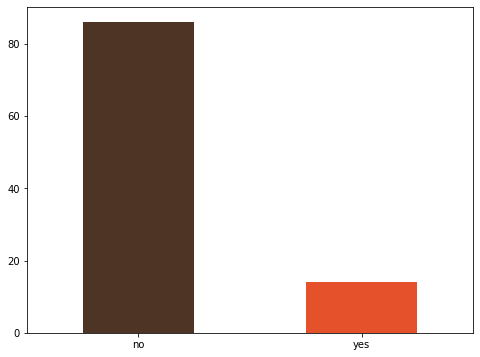

In [ ]:
#Classification labels
#Churn — Whether the customer churned or not (Yes or No), all other yes or no features 

colors = ['#4D3425','#E4512B']
ax = (churn['churn'].value_counts()*100.0 /len(churn)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

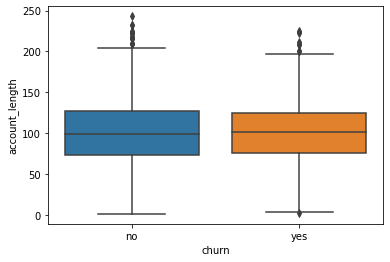

In [ ]:
#find the distribution of the tenure of the telco customers.
sns.boxplot(y=churn["account_length"],x=churn["churn"])

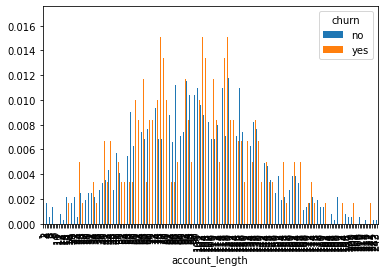

In [ ]:
#Let us first try to find the distribution of the tenure of the customers.

internet=pd.crosstab(churn["account_length"],churn["churn"],normalize="columns").plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

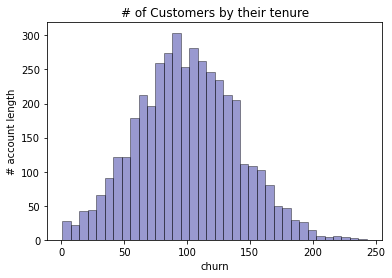

In [ ]:
ax = sns.distplot(churn['account_length'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# account length')
ax.set_xlabel('churn')
ax.set_title('# of Customers by their tenure')

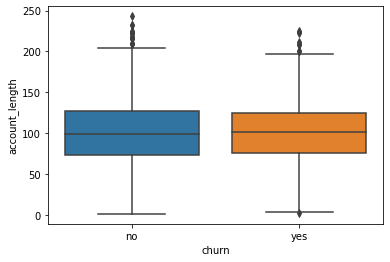

In [ ]:
#Churn vs Tenure

sns.boxplot(x = churn.churn, y = churn.account_length) 

In [ ]:
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


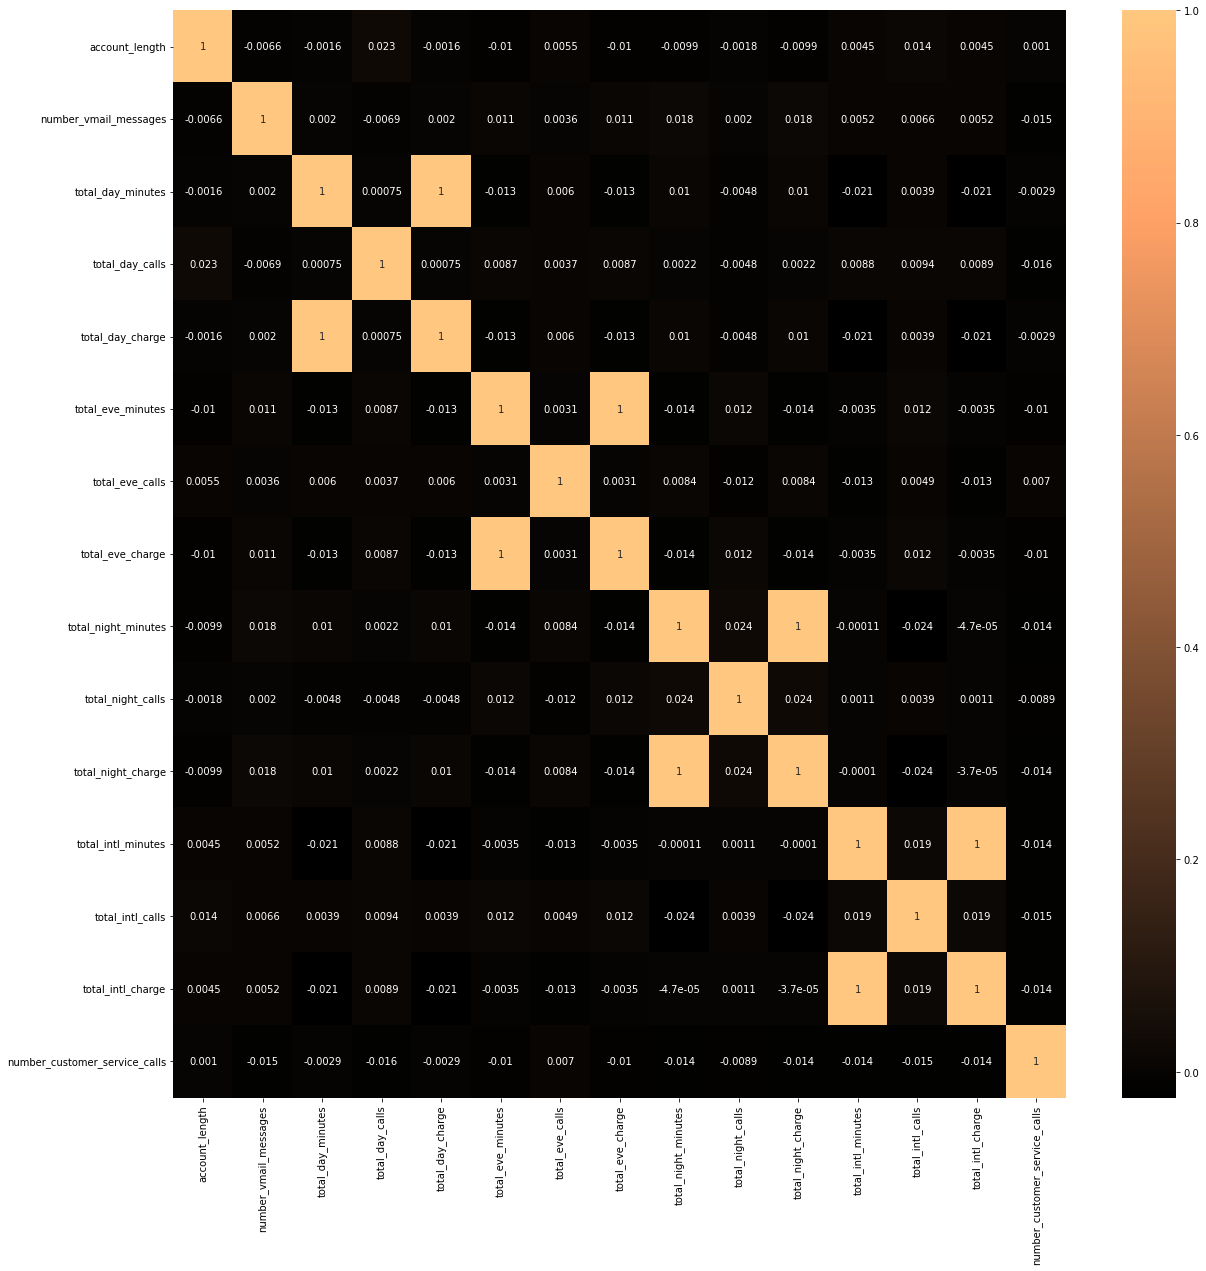

In [ ]:
#visualize correlation of data

plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(churn.corr(), cmap = 'copper', annot = True)

In [ ]:
#Churn by number_customer_service_calls_churn
        
colors = ['#4D3425','#E4512B']
number_customer_service_calls_churn = churn(['number_customer_service_calls','churn']).size().unstack()

ax = (number_customer_service_calls_churn.T*100.0 / number_customer_service_calls_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by number_customer_service_calls_',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
          color = 'white',
          weight = 'bold',
          size = 14)

TypeError: ignored

NameError: ignored

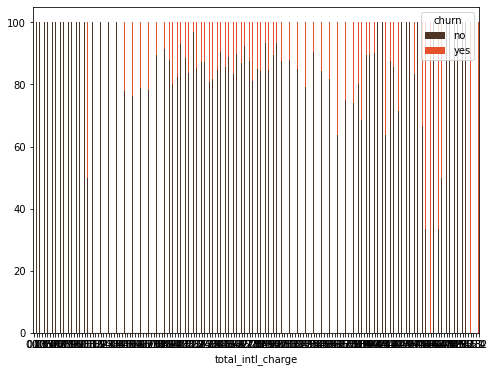

In [ ]:
#Churn by Seniority

colors = ['#4D3425','#E4512B']
total_intl_charg_churn = churn.groupby(['total_intl_charge','churn']).size().unstack()

ax = (total_intl_charg_churn.T*100.0 / total_intl_charg_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [ ]:
#Churn by state

ax = sns.kdeplot(churn.state[(churn["churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(churn.state[(churn["churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('state')
ax.set_title('Distribution of state by churn')

Text(0.5, 1.0, 'Distribution of state by churn')

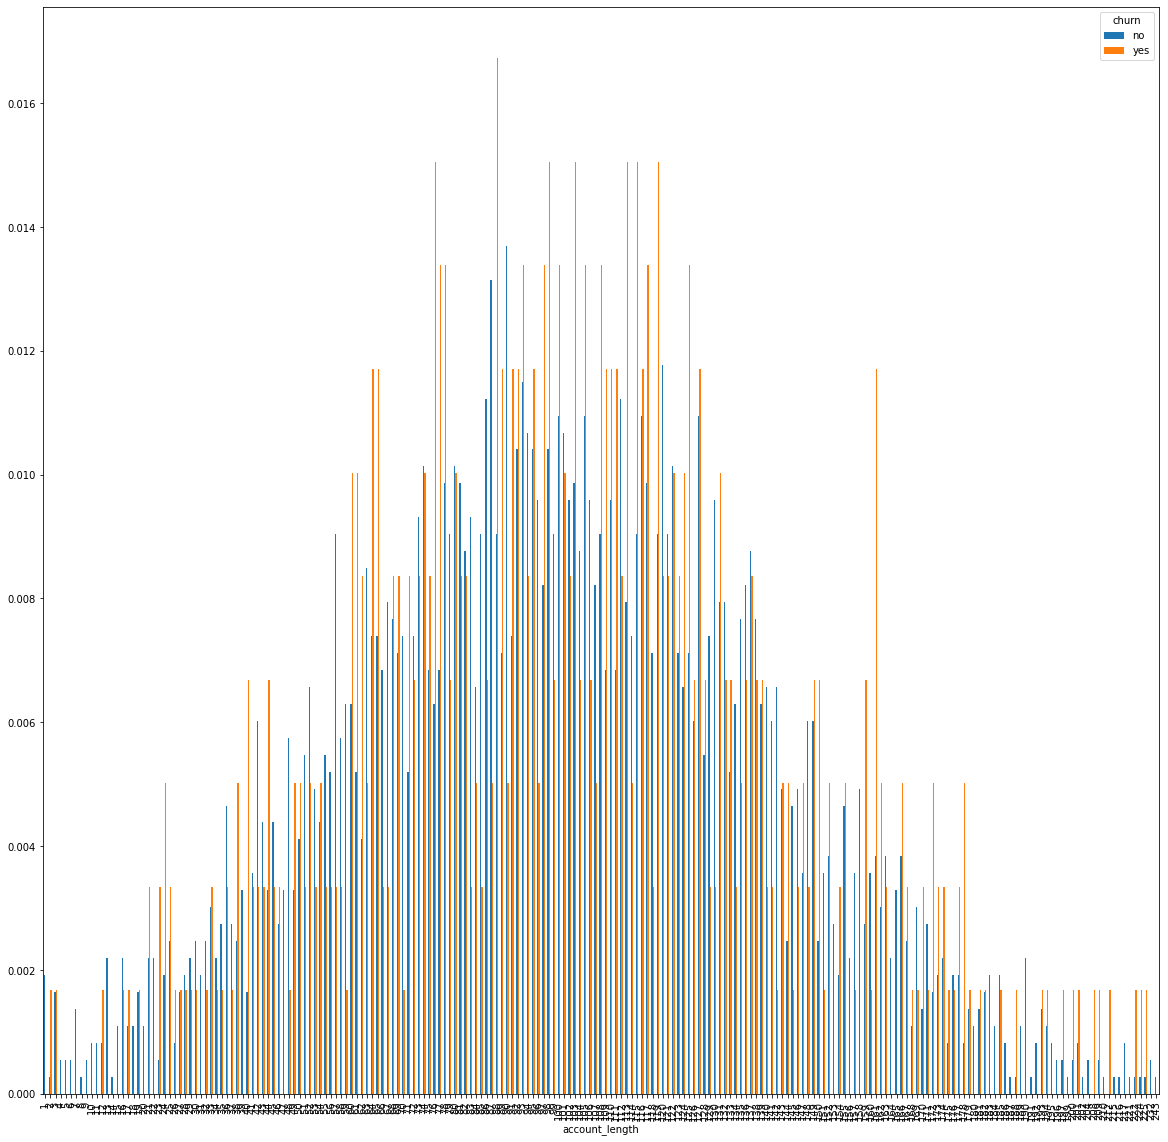

In [ ]:
#Let us see how the duration of the contact affects customer churn

internet=pd.crosstab(churn["account_length"],churn["churn"],normalize="columns").plot(kind="bar")



In [ ]:
# of customers by different contracts

ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

In [ ]:
#Below we will understand the tenure of customers based on their contract type.

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')


In [ ]:
#We will observe that the total charges increases as the monthly bill for a customer increases.

telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

In [ ]:
#look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.



In [ ]:
#For this section we will have to generate additional columns for our categorical variables in the shape f dummy variables.

df['TotalCharges']=pd.to_numeric(df["TotalCharges"],downcast='float',errors='coerce')
df=pd.get_dummies(df,columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'])
df.drop([ 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No'],axis=1,inplace=True)

One of the way is to reduce the dimensionality of the dataset through a principal component analysis. Whether the principal component analysis can be conducted on a categorical dataset is another question. This link on Stack Exchannge provides a different alternative called a multiple correspondence analysis

(MCA).https://stats.stackexchange.com/questions/5774/can-principal-component-analysis-be-applied-to-datasets-containing-a-mix-of-cont

Looking at the features included in data and connecting them to their potential influence on customer churn, the following hypotheses can be made:

In [ ]:
#display frequency distribtion for churn 

plt.style.use("fivethirtyeight")

plt.figure(figsize=(5'5))
ax = sns.countplot(x=churn['churn'], palette ='Blues', linewidth = 1)
plt.show()              

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach.

All visualizations for categorical variables

Now let's look at the numerical variables.

In [ ]:
plt.figure(1), plt.subplot(121), sns.distplot(df['tenure']);
plt.figure(1), plt.subplot(121), sns.distplot(df['MonthlyCharges']);
plt.figure(1), plt.subplot(121), sns.distplot(df['TotalCharges']);

# Step 4: Feature Engineering

In this section we will clean up our dataset by dropping irrelevant data, treating missing values, and converting our variables to the proper data type.

By using the Pandas function “get_dummies()”, we can replace the gender column with “gender_Female” and “gender_Male”. We will use df.info() to show us which ones are categorical and numerical.

In [ ]:
#dropping unecessary features 

df.drop([‘customerID’], axis=1, inplace=True)

In [ ]:
#Converting Categorical to numerical data
#variables with the object datatype need to be converted to numerical.

churn.info()

NameError: name 'churn' is not defined

In [ ]:
df = pd.get_dummies(df, columns = [‘gender’, ‘Partner’,   ‘Dependents’,’PhoneService’,’MultipleLines’,’InternetService’,
‘OnlineSecurity’,’OnlineBackup’,’DeviceProtection’,’TechSupport’,’StreamingTV’,‘StreamingMovies’,’Contract’,’PaperlessBilling’,’PaymentMethod’,’Churn’], drop_first = True)

In [ ]:
#use df.info() to check that all our variables were converted to the appropriate data type

churn.info()

In [ ]:
#use pd.numeric() function to convert it to a float.

df[‘TotalCharges’] = pd.to_numeric(df.TotalCharges, errors = ‘coerce’)
df.drop([‘TotalCharges’], axis = 1, inplace = True)

# Step 5: Train/Test Split

First our model needs to be trained, second our model needs to be tested. X is the data with the independent variables, Y is the data with the dependent variable. The test size variable determines in which ratio the data will be split. It is quite common to do this in an 80 Training / 20 Test ratio.

In [ ]:
df[‘Churn_Yes’] = df[‘Churn_Yes’].astype(int)
Y = df[“Churn_Yes”].values
X = df.drop(labels = [“Churn_Yes”],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# Step 6: Model Evaluation Metrics Definition

The model experimented four algorithms: Decision Tree, Random Forest, Gradient Boosted Machine Tree “GBM” and Extreme Gradient Boosting “XGBOOST”. However, the best results were obtained by applying XGBOOST algorithm. This algorithm was used for classification in this churn predictive model.

Logistic Regression & Model Testing. First model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome. We will use scikit-learn (sklearn) for making different models which is an open source library for Python. 

For performance assessment of the chosen models, various metrics are used:
- Feature weights: Indicates the top features used by the model to generate the predictions
- Confusion matrix: Shows a grid of true and false predictions compared to the actual values
- Accuracy score: Shows the overall accuracy of the model for training set and test set
- ROC Curve: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) - for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)
- AUC (for ROC): Measures the overall separability between classes of the model related to the ROC curve
- Precision-Recall-Curve: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for - different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance
- F1 Score: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.
- AUC (for PRC): Measures the overall separability between classes of the model related to the Precision-Recall curve

Logistic Regression

In [ ]:
#logistic regression

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_pred,y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
#The dataset has been divided into training and validation part
#import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn import metrics
prediction_test = model.predict(X_test)# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.800567778566

So our predictions are almost 81% accurate, i.e. we have identified 80% of the churn rate correctly. So with the final objective to reduce churn and take the right preventing actions in time, we want to know which independent variables have the most influence on our predicted outcome. Therefore we set the coefficients in our model to zero and look at the weights of each variable.

In [ ]:
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

Decision Tree Classifier

In [ ]:
#decision tree classifier

dc=DecisionTreeClassifier()f
dc.fit(X_train,y_train)
y_pred=dc.predict(X_test)
Tree',accuracy_score(y_pred,y_test),'\n'
        'Confusion Matrix with Decision Tree', confusion_matrix(y_pred,y_test))

In [ ]:
Accuracy Score with Decision Tree 0.7381121362668559 
Confusion Matrix with Decision Tree [[843 194]
 [175 197]]

Support Vecor Machine (SVM)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

In [ ]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds)) 

we need to take a deeper look at the true positive and true negative rates, including the Area Under the Curve (AUC) for a better prediction. 

AdaBoost 

In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

XG Boost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

In [ ]:
#GridSearchCV on a random forest classifier to see whether the score of the model can be improved.We used a Randomised Search CV to identify the best estimates for the random forest classifier and then using those estimates we built a
#random forest classifier. Let us see the results below
#We used a Randomised Search CV to identify the best estimates for the random forest classifier and then using those estimates we built a random forest classifier. Let us see the results below

rom sklearn.model_selection import RandomizedSearchCV
estimators=range(50,100)
max_features = ['auto', 'sqrt']
max_depth = range(4,12)
min_samples_split = range(2,8)
min_samples_leaf = range(1,8)
bootstrap = [True, False]
criterion=['gini','entropy']
random_grid = {'n_estimators':estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap,
              'criterion':criterion}
rf=RandomForestClassifier()
rf=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,verbose=1)
rf.fit(X_train,y_train)
best_estimate=rf.best_params_
rf2=RandomForestClassifier(**best_estimate)
rf2.fit(X_train,y_train)
y_pred=rf2.predict(X_test)
print(classification_report(y_pred,y_test))

It can be observed that some variables have a positive relation to our predicted variable and some have a negative relation. Customers with negative values show that they are unlikely to churn while those with positive values shows they are likely to churn. 

In [ ]:
churn prediction model 

 In order to measure the performance of the model, the Area Under Curve (AUC) standard measure is adopted, and the AUC value obtained is 93.3%. Another main contribution is to use customer social network in the prediction model by extracting Social Network Analysis (SNA) features. The use of SNA enhanced the performance of the model from 84 to 93.3% against AUC standard. 